In [1]:
#Library Imports
import pandas as pd
import numpy as nd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import File
Mktcus5 = pd.read_csv("marketing_customer_analysis.csv")

In [3]:
## Data Cleaning
Mktcus5.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Standardizing headers - Removing spaces
Mktcus5.columns = Mktcus5.columns.str.replace(' ','')

In [5]:
Mktcus5.columns = Mktcus5.columns.str.lower()

In [6]:
# Header Check
Mktcus5.head()

,customer,state,customerlifetimevalue,response,coverage,education,effectivetodate,employmentstatus,gender,income,...,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,policytype,policy,renewoffertype,saleschannel,totalclaimamount,vehicleclass,vehiclesize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Analysis

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
# Setting up df for only numerical columns
Mktnum = Mktcus5.select_dtypes('number')

In [9]:
# Mktnum Header Check
Mktnum.head()

,customerlifetimevalue,income,monthlypremiumauto,monthssincelastclaim,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,totalclaimamount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [10]:
# Mktnum describe
Mktnum.describe()

,customerlifetimevalue,income,monthlypremiumauto,monthssincelastclaim,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,totalclaimamount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [26]:
# X - Y Split 
# Setting up Y (dependent) and X(independent) values

# Y being "customerlifetimevalue"
Y = Mktnum['totalclaimamount']

# X being Mktnum - "customerlifetimevalue" column

X = Mktnum.drop(['totalclaimamount'], axis = True)

## Normalize numerical

In [27]:
#4 Import library
from sklearn.preprocessing import StandardScaler

In [28]:
# Use StandardScaler to normalise the data
scaler = StandardScaler().fit(Mktnum)
standardized_X = scaler.transform(Mktnum)
standardized_X_test = scaler.transform(Mktnum)

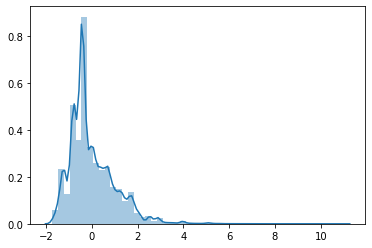

In [25]:
# Plot distributions
sns.distplot(standardized_X_test)
plt.show()